Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved. SPDX-License-Identifier: MIT-0

# Building Generative AI applications using graphs in Amazon Neptune

## Introduction

In this workshop we will be playing the part of a builder on an internal security team where you are assigned to work on a high priority project to provide tooling to improve your security posture through exposing software dependencies and vulnerabilities using Software Bill Of Materials (SBOM).Throughout these notebooks you will examine two different approaches to combining graphs and Large Language Models (LLMs) to build generative AI applications using Amazon Neptune.  

First, we will leverage generative AI to make working with existing graphs easier and more accessible to users.  We will accomplish this by examining two different techniques (Open Domain and Defined Domain) to provide users with natural language question answering capabilities.

Second, we will look at how we can enhance the retrieval in a RAG application to leverage connected ideas, not just similar text, to provide more complete and explainable answers using a technique known as graph enhanced RAG or GraphRAG.  

To accomplish these goals, we will go through the exercise that follow to complete a partially working chatbot application to answer questions about SBOMs.  

**Note** In addition to our incomplete application we have also provided a completed application that you can run to see a functional version of the end application.

By the end of this workshop we will have finished the construction of our chatbot application, similar to example below:

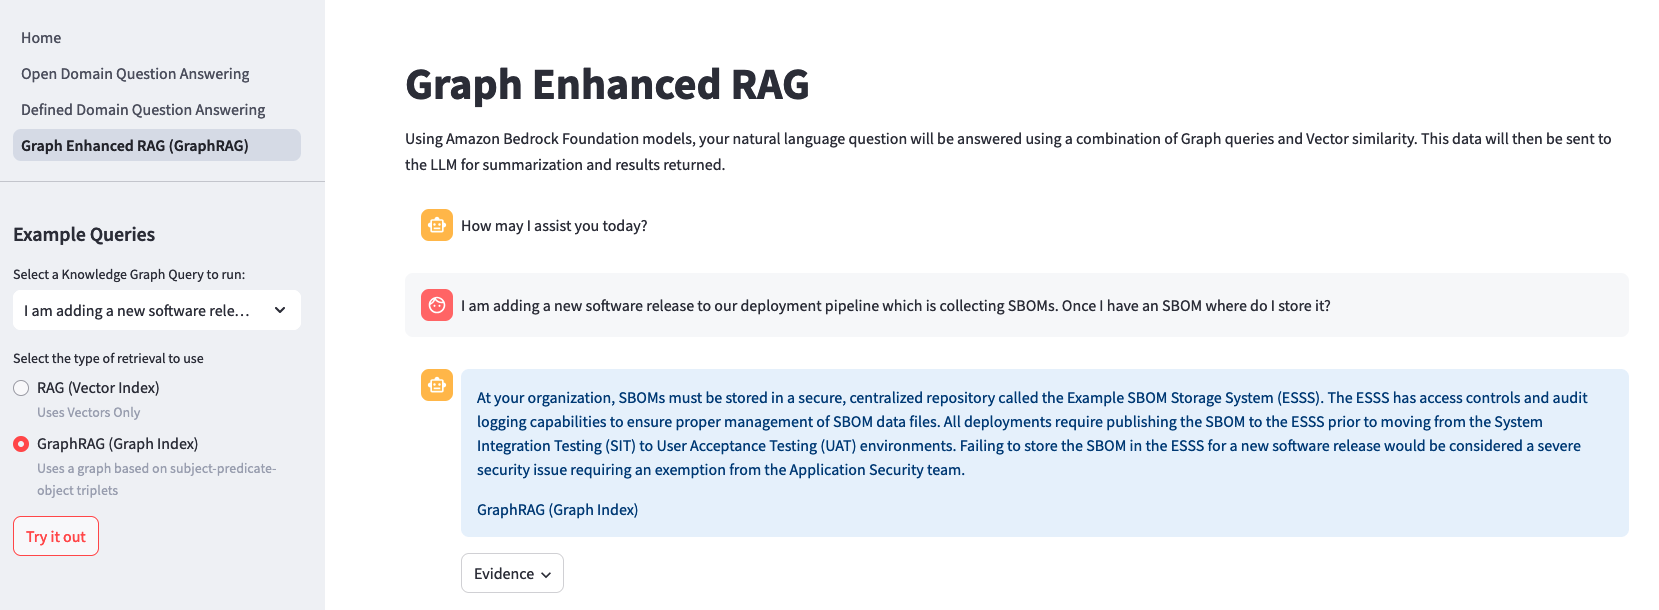


### Getting Started

Let's start by first taking a look at our completed application.

Run the following cell.  This will return a clickable link for the chat app running in this account.  Click on the link to launch the app and follow the additional instructions in the cell below.

<div class="alert alert-block alert-warning"> 
<details>
    <summary>💡 <b><i>Click here if you are new to Jupyter</i></b></summary>
If you have never used Jupyter before, you can run the cell by clicking on the play button to the left of the cell.  An asterisk will appear in the `[ ]` next to the cell to denote it is running.  Once the cell has completed, a number will appear inside of the `[ ]`. 
        </details>
</div>

In [ ]:
import subprocess

# Fetch the CloudFormation stack output
output_value = subprocess.check_output(
    ["aws", "cloudformation", "describe-stacks",
     "--stack-name", "workshop",
     "--query", "Stacks[0].Outputs[?OutputKey==`StreamlitEndpoint`].OutputValue | [0]",
     "--output", "text"]
).decode().strip()

# Display the clickable link to the chat app
from IPython.display import Markdown

display(Markdown(f"<a href={output_value} target=\"_blank\">Click here to open the Chatbot application</a>"))

## Trying out our completed application

In the application there are links on the left sidebar to different pages, each of which demonstrates each of these techniques.  Within each page there is a set of questions that you can use for tests, or you can enter your own question into the box below:

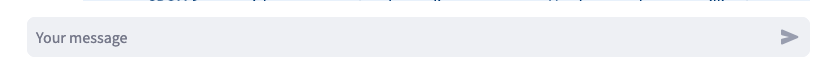

Each page in the application highlights a specific technique

### Open Domain Question Answering

This page allows you to ask a natural language question, have that question be turned into a graph query, and have that query executed and the data returned.  Given the open nature of the questions allowed by this technique the user may ask any question of the system, providing a highly flexible, yet less secure, mechanism for accessing data.

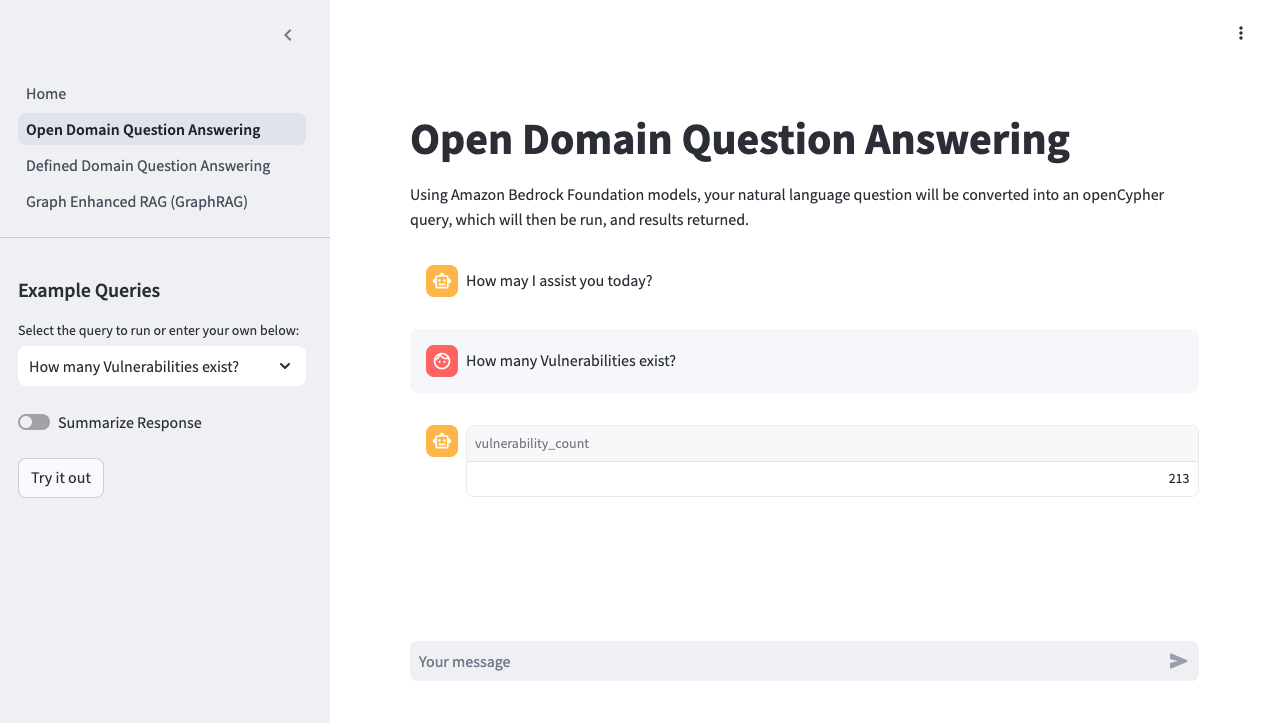

### Defined Domain Question Answering
This page allows you to ask a natural language question, map it to one of a set of predefined actions, extract any key entities/identifiers from the question, and then use those as input to a pre-configured query.  This technique be thought of as sort of phone tree, where the user can make any request they would like but only a small set of actions are allowed.  Given the defined nature of the questions allowed, this technique the user may only ask any question allowed by the developers, providing a secure and optimized experience for the end user.  e.g. Find me information about openldap?

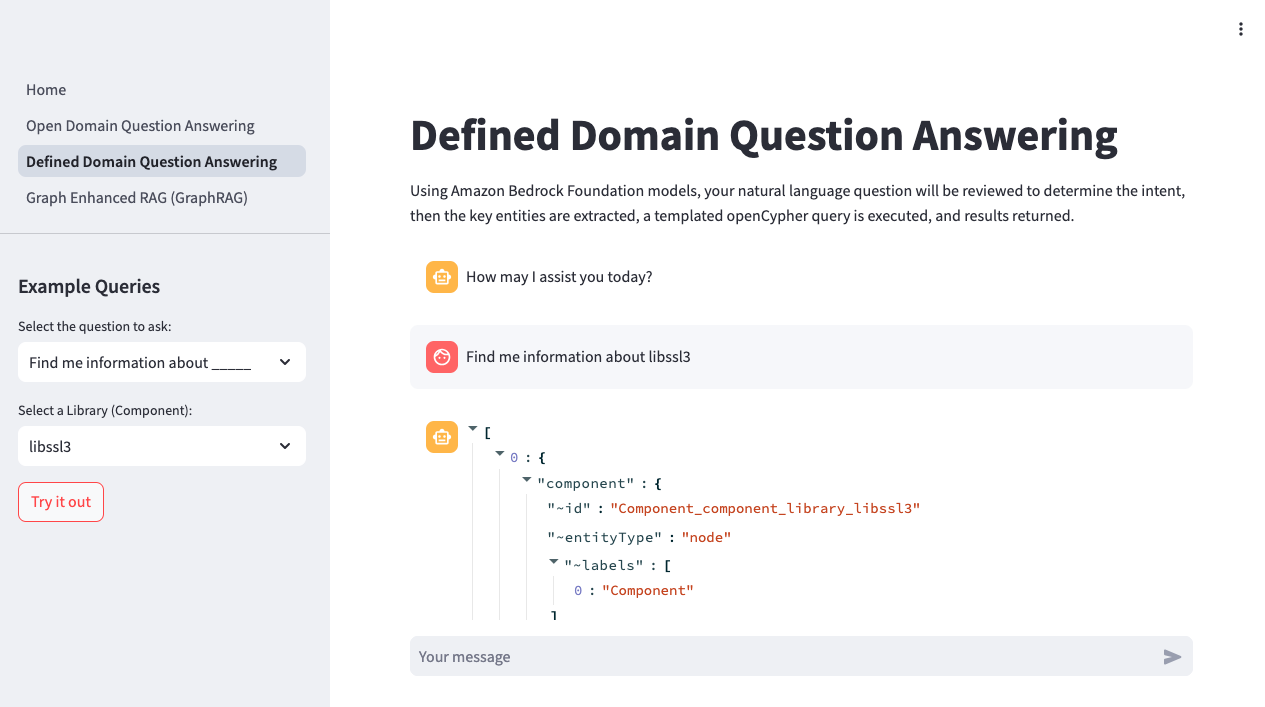

### Graph Enhanced RAG (GraphRAG) 
This page allows you to ask a natural language question and see how it is answered by either a vector similarity based RAG solution, by setting the `RAG (Vector Index)` radio button in the left sidebar or by graph enhanced RAG, by setting the `GraphRAG (Graph Index)`radio button.  This will allow you to experiment and see the types of questions where a graph enhanced RAG provides improved responses.


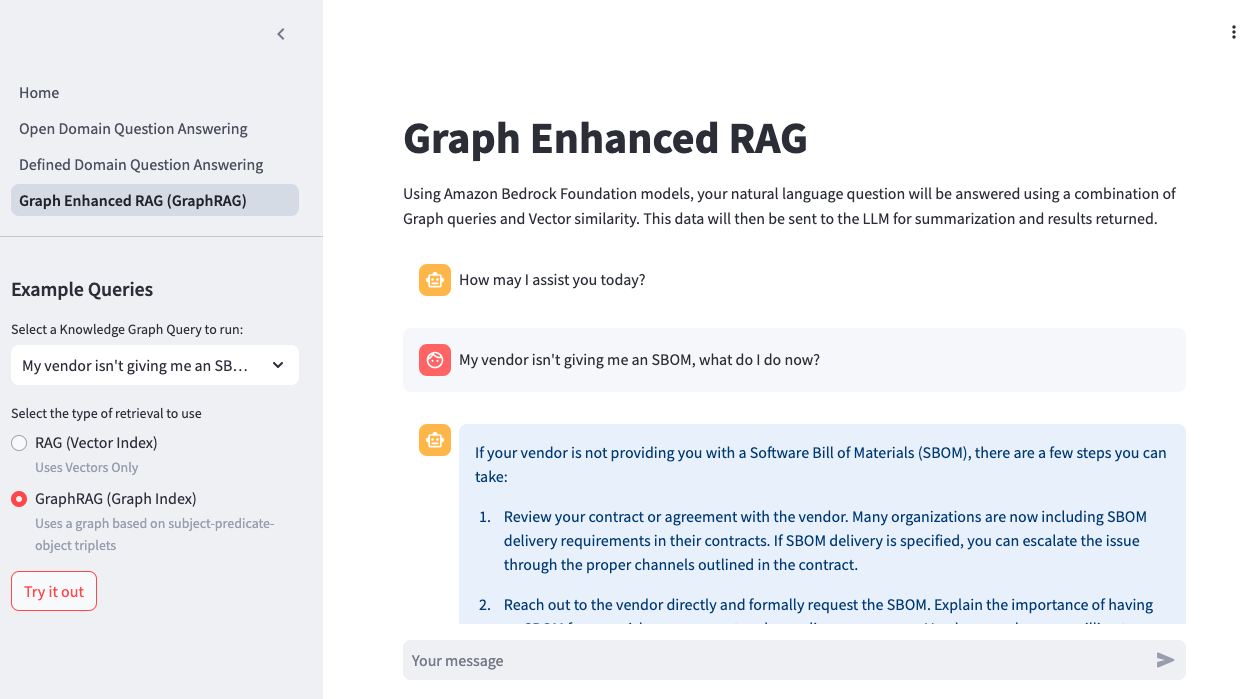

## Next Steps 

Now that we have tried out our completed application we have an understanding of the application we are going to be completing.  Now you can either continue in this notebook to learn about Neptune Analytics and the openCypher query language you can skip the remainder of this notebook and move on to the next notebook. 




## Optional - Graph Primer

Before we get started in building our application, let's first take a look at using Amazon Neptune Analytics.  Neptune Analytics is a memory-optimized graph database engine for analytics. With Neptune Analytics, you can get insights and find trends by processing large amounts of graph data in seconds. To analyze graph data quickly and easily, Neptune Analytics stores large graph datasets in memory. It supports a library of optimized graph analytic algorithms, low-latency graph queries, and vector search capabilities within graph traversals.


Run the following two cells below to check the connection to our Amazon Neptune Analytics graph. This will return some details about what we currently have in our graph.

<div class="alert alert-info">
    <strong>Side note</strong>: We will be using a set of custom Jupyter magics (<a href="https://docs.aws.amazon.com/neptune-analytics/latest/userguide/notebooks.html">custom commands</a>) in this workshop that are provided via the <a href="https://github.com/aws/graph-notebook">Graph Notebook</a> open source project.
</div>

Run the following command to load the data for our small graph of SBOM data:

In [ ]:
%%oc
MATCH (n) DETACH DELETE n
WITH collect(n) as cnt
CALL neptune.load({format: 'csv', source: 's3://aws-neptune-customer-samples-us-west-2/workshops/building_genai_apps_using_neptune/sbom_data/',format: 'csv'})
YIELD totalRecords
RETURN totalRecords

We now have a small graph of SBOM data and various ways they are connected.  With openCypher you can query this graph using the `MATCH` clause as shown in the following queries.  Run the below queries to see examples of how to query this graph to find all `Component` nodes that have a `name` of `python`.

In [ ]:
%%oc

MATCH (n:Component)
WHERE n.name = 'python'
RETURN n

Run the below queries to see examples of how to query this graph to return the id all `Component` nodes that are connected to a `Component` node with a `name` of `python`.

In [ ]:
%%oc

MATCH (n:Component)-[]-(m)
WHERE n.name = 'python'
RETURN DISTINCT id(m)

The previous two queries were simple queries for finding related nodes in our graph.  Graphs are also good for showing paths, or how things are connected.  Run the following query.  After running this query, click on the `Graph` tab in the results output to see a visualization of the returned paths.

In [ ]:
%%oc -d name

MATCH p=(n)-[]-(m)
WHERE n.name = 'python'
RETURN p

While we can run queries to traverse our graph, as shown above, Neptune Analytics also has the ability to run built-in graph algorithms against our data.  For example, what if we wanted to know which software component was the most "connected"?  

Using an algorithm such as Degree (or the number of edges per node) will provide us that answer:

<div class="alert alert-info">
    <strong>Side Note</strong>: Using *degree* in Neptune Analytics: <a href="https://docs.aws.amazon.com/neptune-analytics/latest/userguide/degree.html">https://docs.aws.amazon.com/neptune-analytics/latest/userguide/degree.html</a>
</div>

In [ ]:
%%oc

MATCH (b:Component)
CALL neptune.algo.degree(b)
YIELD node, degree
RETURN node.name, degree
ORDER BY degree DESC

Now that you know how to interact with Neptune Analytics using openCypher. 

**Continue to part 2 of the workshop in the [next notebook](./2-Open-Domain-Question-Answering.ipynb).**

For a more complete tutorial on openCypher you can visit our language tutorials.

* [openCypher Basic Read Queries](../04-Language-Tutorials/02-openCypher/01-Basic-Read-Queries.ipynb)
* [openCypher Variable Length Paths](../04-Language-Tutorials/02-openCypher/02-Variable-Length-Paths.ipynb)
* [openCypher Ordering/Functions/Grouping](../04-Language-Tutorials/02-openCypher/03-Ordering-Functions-Grouping.ipynb)
* [openCypher Creating/Updating/Deleting Queries](../04-Language-Tutorials/02-openCypher/04-Creating-Updating-Delete-Queries.ipynb)